In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA

import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec

from scipy import integrate
from scipy.integrate import solve_ivp
from itertools import permutations, repeat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic map

In [76]:
def logistic(r: float, steps:int, x = 0.2) -> float:
    for i in range(steps):
        x = r * x * (1-x)
    return x

In [77]:
def logistic_graph():
    figure(figsize=(10, 10), dpi=80)
    r_values = np.arange(0, 4, 0.00001)
    value = logistic(r_values,500)
    for i in range(0,25):
        value = logistic(r_values,1, x = value)
        plt.plot(r_values, value,',k',alpha=0.25)
    plt.show()

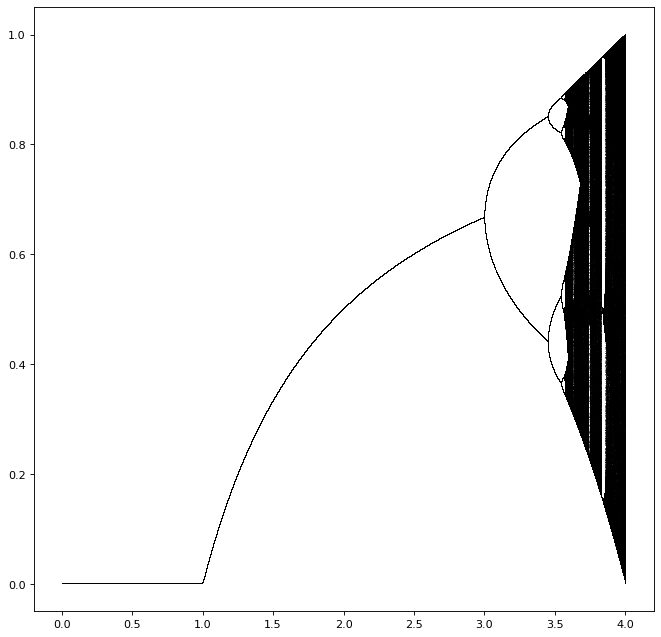

In [78]:
logistic_graph()

# Lorenz

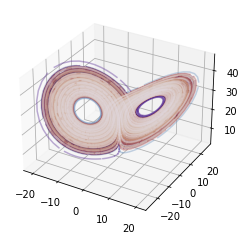

<Figure size 450x450 with 0 Axes>

In [68]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = 10
Y = 10
Z = 10

sigma = 10
rho = 28
beta = 8/3

dTau = 0.01
timeEnd = 1000
steps = int(timeEnd/dTau)

def lorenz(t,point,sigma,beta,rho):
    X,Y,Z = point
    dX = -sigma*X + sigma*Y
    dY = -X * Z + rho*X - Y 
    dZ = X*Y-beta*Z
    return dX,dY,dZ

t = np.linspace(0, timeEnd, steps)
soln = solve_ivp(lorenz, (0, timeEnd), (X,Y,Z), args=(sigma, beta, rho),dense_output=True)
x, y, z = soln.sol(t)

fig = plt.figure(figsize=(500/80, 500/80))
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
j = 10
colors = plt.cm.jet(np.linspace(0,1,int(steps/j)))
for i in range(0,steps,j):
    ax.plot(x[i:i+j], y[i:i+j], z[i:i+j],color = colors[int(i/j)],alpha=0.4)
plt.show()

Steps it took: 2481
Time it took: 24.810000000000002


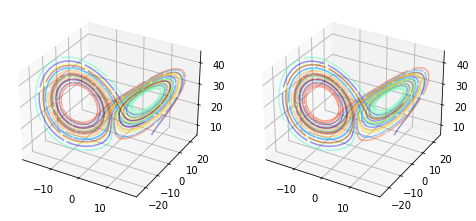

In [62]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')


X = 10
Y = 10
Z = 10

X1 = 10+0.00000001
Y1 = 10
Z1 = 10

sigma = 10
rho = 28
beta = 8/3

dTau = 0.01
timeEnd = 30
steps = int(timeEnd/dTau)

def lorenz(t,point,sigma,beta,rho):
    X,Y,Z = point
    dX = -sigma*X + sigma*Y
    dY = -X * Z + rho*X - Y 
    dZ = X*Y-beta*Z
    return dX,dY,dZ

t = np.linspace(0, timeEnd, steps)
sol = solve_ivp(lorenz, (0, timeEnd), (X,Y,Z), args=(sigma, beta, rho),dense_output=True)
sol1 = solve_ivp(lorenz, (0, timeEnd), (X1,Y1,Z1), args=(sigma, beta, rho),dense_output=True)
x, y, z = sol.sol(t)
x1, y1, z1 = sol1.sol(t)
distance = np.sqrt(np.square(x-x1) + np.square(y-y1) + np.square(z-z1))
steps_needed = -1
for i in range(0,steps):
    if distance[i] >= 1:
        steps_needed = i
        break
print("Steps it took: " + str(steps_needed))
print("Time it took: " + str(steps_needed*dTau))

j = 10
colors = plt.cm.jet(np.linspace(0,1,int(steps/j)))
for i in range(0,steps,j):
    ax.plot(x[i:i+j], y[i:i+j], z[i:i+j],color = colors[int(i/j)],alpha=0.4)
    ax1.plot(x1[i:i+j], y1[i:i+j], z1[i:i+j],color = colors[int(i/j)],alpha=0.4)

plt.show()

Time run: 24.81
Final distance: 4.6583664751711685e-15


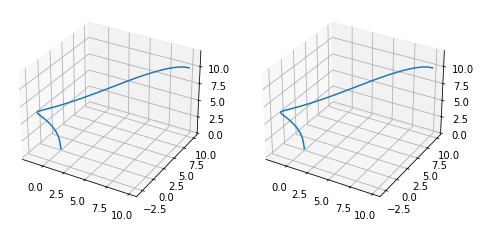

In [74]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')


X = 10
Y = 10
Z = 10

X1 = 10+0.00000001
Y1 = 10
Z1 = 10

sigma = 10
rho = 0.5
beta = 8/3

dTau = 0.01
timeEnd = 24.81
steps = 2481

def lorenz(t,point,sigma,beta,rho):
    X,Y,Z = point
    dX = -sigma*X + sigma*Y
    dY = -X * Z + rho*X - Y 
    dZ = X*Y-beta*Z
    return dX,dY,dZ

t = np.linspace(0, timeEnd, steps)
sol = solve_ivp(lorenz, (0, timeEnd), (X,Y,Z), args=(sigma, beta, rho),dense_output=True)
sol1 = solve_ivp(lorenz, (0, timeEnd), (X1,Y1,Z1), args=(sigma, beta, rho),dense_output=True)
x, y, z = sol.sol(t)
x1, y1, z1 = sol1.sol(t)
distance = np.sqrt(np.square(x-x1) + np.square(y-y1) + np.square(z-z1))
print("Time run: " + str(timeEnd))
print("Final distance: " + str(distance[steps-1]))

ax.plot(x, y, z,alpha=1)
ax1.plot(x1, y1, z1,alpha=1)

plt.show()